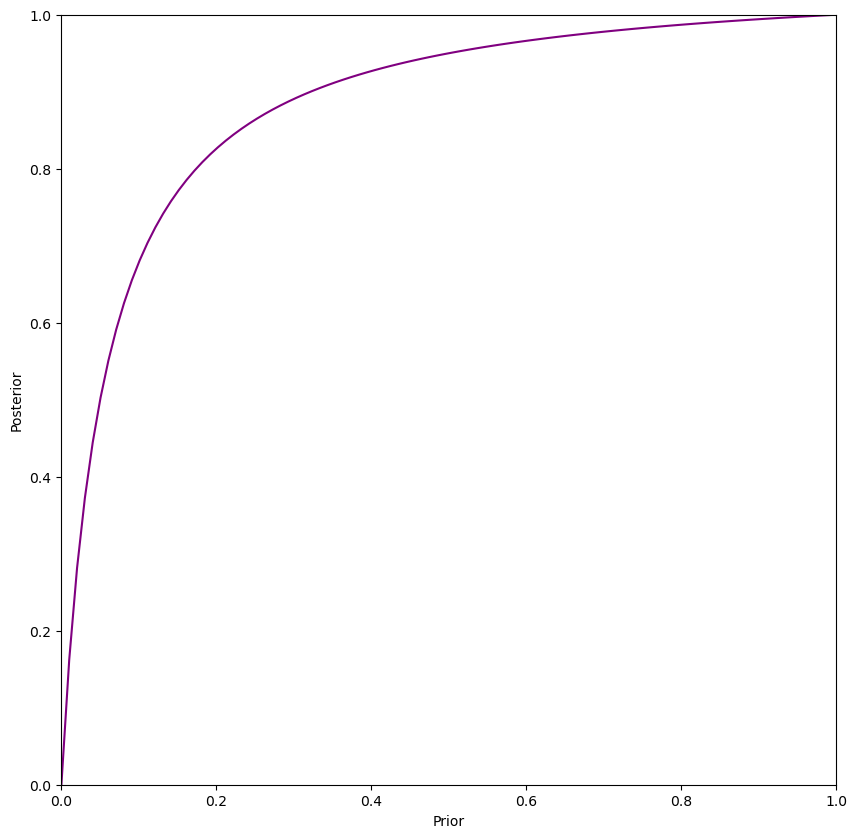

In [1]:
import numpy as np
import matplotlib.pyplot as plt

SENSITIVITY = 0.95
SPECIFICITY = 0.95

def posterior(prior, sensitivity, specificity):
    return (sensitivity * prior) / (sensitivity * prior + (1 - specificity) * (1 - prior))

priors = np.linspace(0, 1, 100)
posteriors = posterior(priors, SENSITIVITY, SPECIFICITY)

plt.figure(figsize=(10, 10))
plt.plot(priors, posteriors, color = 'purple')
plt.xlim(0, 1) 
plt.ylim(0, 1)
plt.xlabel('Prior')
plt.ylabel('Posterior')
plt.show()



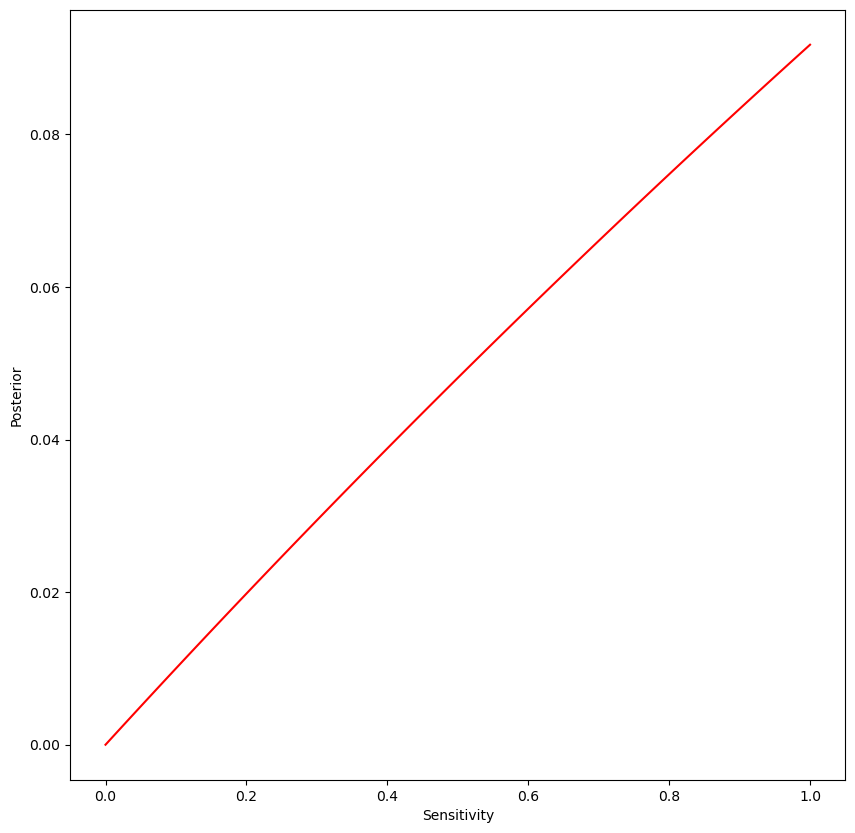

In [3]:
import numpy as np
import matplotlib.pyplot as plt

prior = 0.01
specificity = 0.90

def posterior_prob(prior, sensitivity, specificity):
    return (sensitivity * prior) / ((sensitivity * prior) + ((1 - specificity) * (1 - prior)))

sensitivities = np.linspace(0, 1, 100)
posteriors = [posterior_prob(prior, sens, specificity) for sens in sensitivities]

# Plot
plt.figure(figsize=(10, 10))
plt.plot(sensitivities, posteriors, color = 'red')
plt.xlabel('Sensitivity')
plt.ylabel('Posterior')
plt.show()

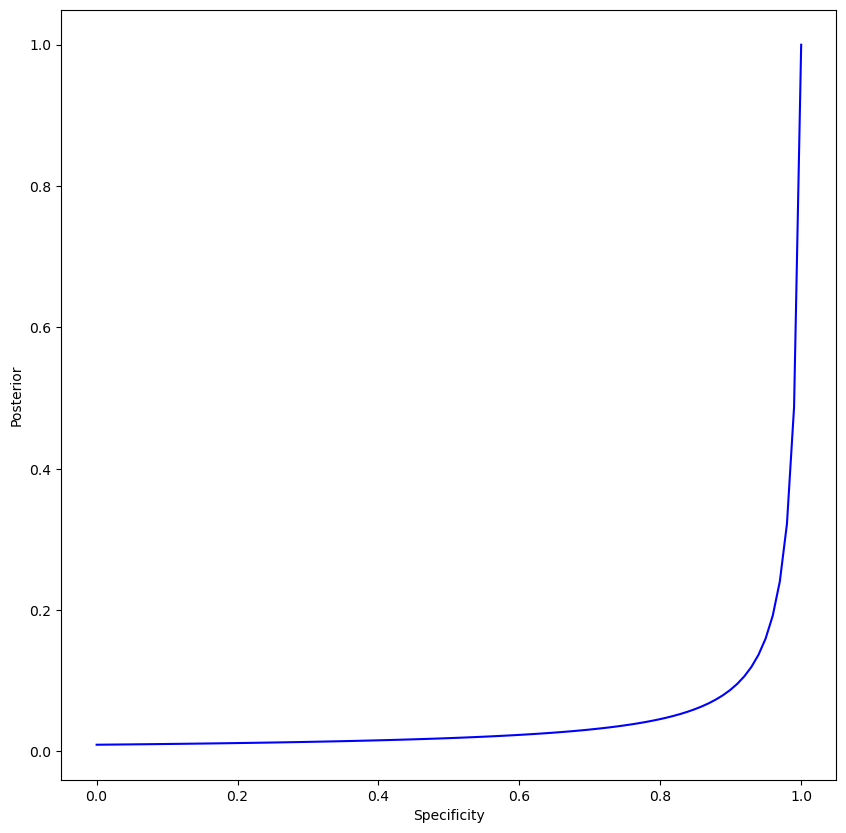

In [4]:
import numpy as np
import matplotlib.pyplot as plt

prior = 0.01
sensitivity = 0.95

def posterior_prob(prior, sensitivity, specificity):
    return (sensitivity * prior) / ((sensitivity * prior) + ((1 - specificity) * (1 - prior)))

# Vary specificity from 0 to 1
specificities = np.linspace(0, 1, 100)
posteriors = [posterior_prob(prior, sensitivity, sp) for sp in specificities]

# Plot
plt.figure(figsize=(10, 10))
plt.plot(specificities, posteriors, color = 'blue') 
plt.xlabel('Specificity')
plt.ylabel('Posterior')
plt.show()

In [ ]:
'''
As the disease becomes more common (higher prior), the posterior increases because a positive test is more believable.

Increasing sensitivity (correctly detecting disease) lowers false negatives, raising the posterior.

Increasing specificity (correctly identifying healthy individuals) lowers false positives, also raising the posterior.

'''

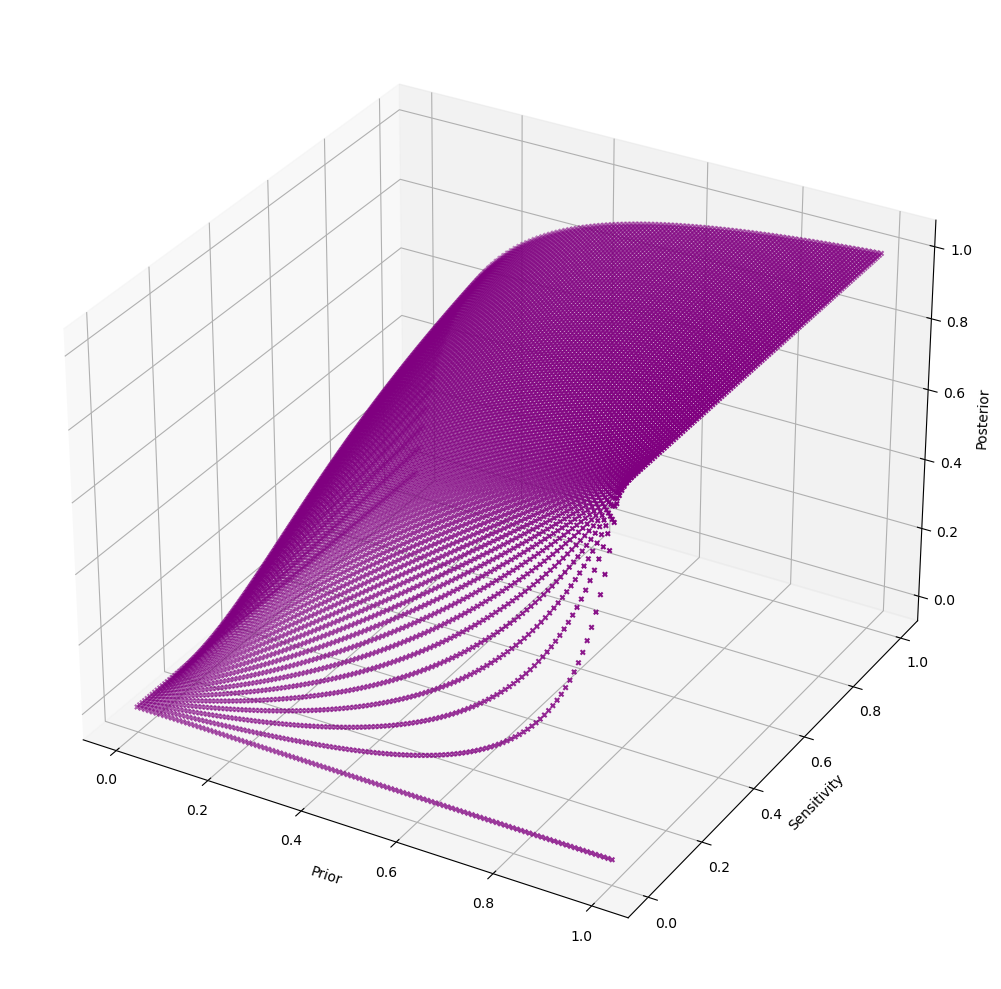

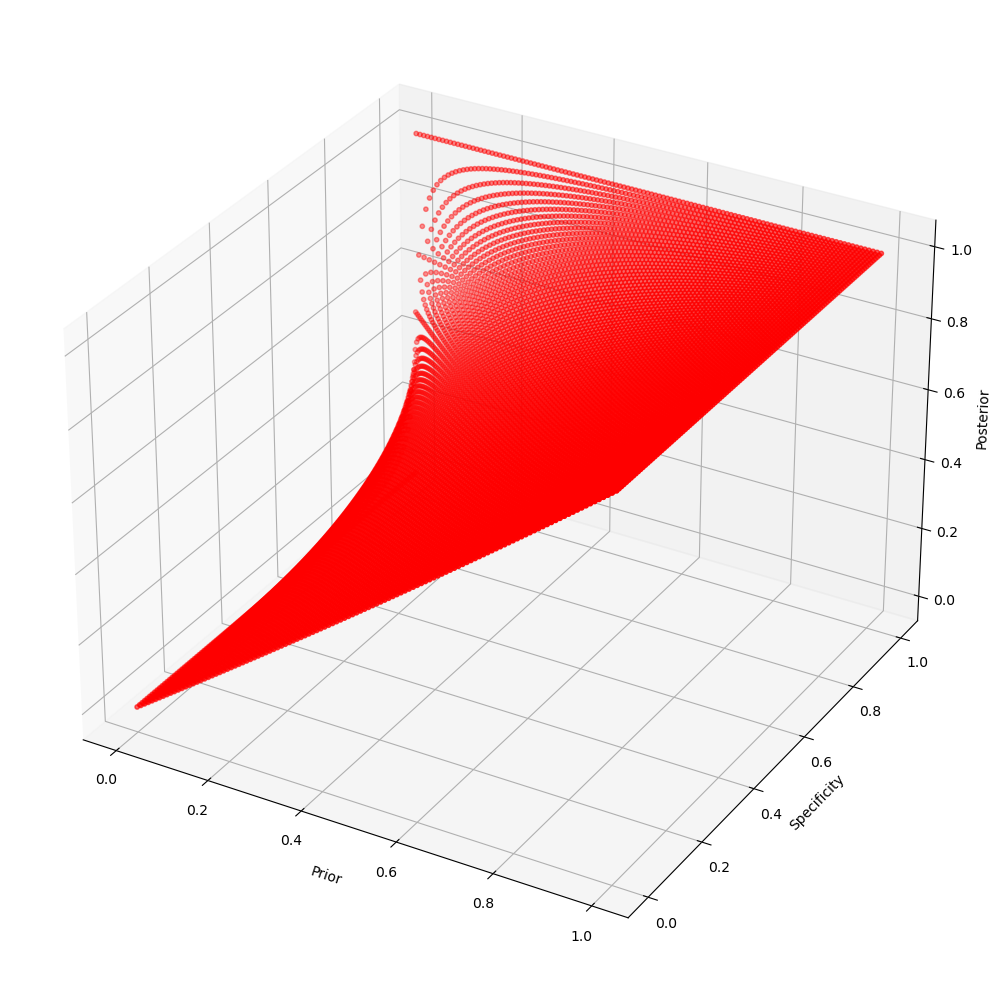

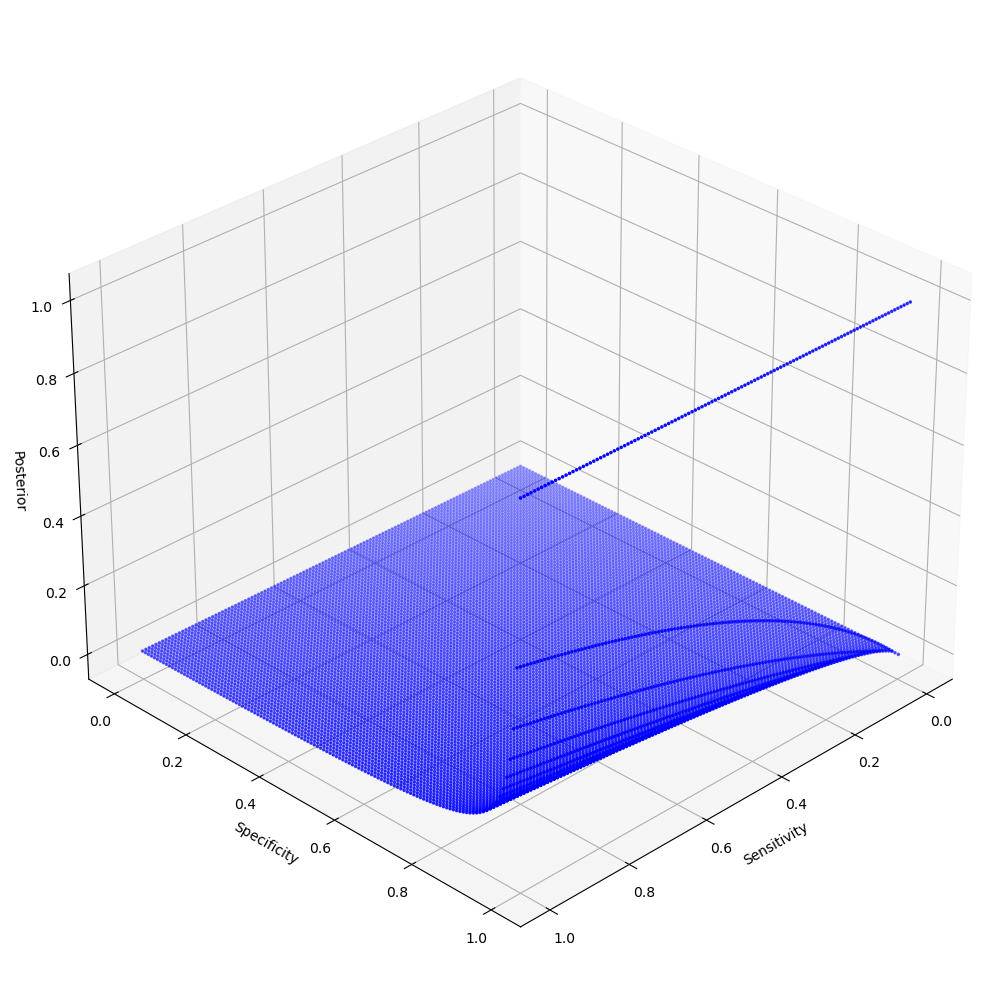

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def posterior_prob(prior, sensitivity, specificity, eps=1e-10):
    denom = (sensitivity * prior) + ((1 - specificity) * (1 - prior))
    return (sensitivity * prior) / (denom + eps)

points = 120
prior_values = np.linspace(0, 1, points)
sensitivity_values = np.linspace(0, 1, points)
specificity_values = np.linspace(0, 1, points)

# First graph
fixed_specificity = 0.90
prior_grid, sensitivity_grid = np.meshgrid(prior_values, sensitivity_values)
posterior_grid1 = posterior_prob(prior_grid, sensitivity_grid, fixed_specificity)
fig1 = plt.figure(figsize=(10, 10))
graph1 = fig1.add_subplot(111, projection='3d')
graph1.scatter(prior_grid, sensitivity_grid, posterior_grid1, c='purple', marker='x', s=10)
graph1.set_xlabel('Prior')
graph1.set_ylabel('Sensitivity')
graph1.set_zlabel('Posterior')
plt.tight_layout()
plt.show()

# Second graph
fixed_sensitivity = 0.95
prior_grid2, specificity_grid = np.meshgrid(prior_values, specificity_values)
posterior_grid2 = posterior_prob(prior_grid2, fixed_sensitivity, specificity_grid)
fig2 = plt.figure(figsize=(10, 10))
graph2 = fig2.add_subplot(111, projection='3d')
graph2.scatter(prior_grid2, specificity_grid, posterior_grid2, c='red', marker='o', s=10)
graph2.set_xlabel('Prior')
graph2.set_ylabel('Specificity')
graph2.set_zlabel('Posterior')
plt.tight_layout()
plt.show()

# Third graph
fixed_prior = 0.01
sensitivity_grid3, specificity_grid3 = np.meshgrid(sensitivity_values, specificity_values)
posterior_grid3 = posterior_prob(fixed_prior, sensitivity_grid3, specificity_grid3)
fig3 = plt.figure(figsize=(10, 10))
graph3 = fig3.add_subplot(111, projection='3d')
graph3.scatter(sensitivity_grid3, specificity_grid3, posterior_grid3, c='blue', marker='.', s=10)
graph3.set_xlabel('Sensitivity')
graph3.set_ylabel('Specificity')
graph3.set_zlabel('Posterior')
graph3.view_init(elev=30, azim=45)
plt.tight_layout()
plt.show()